# GENPACT: Pubmed Text Classification

## Problem: Classify given set of Pubmed biomedical literature abstracts into 4 classes:
a)	Abstracts containing Drug adverse events  
b)	Abstracts containing Congenital anomalies  
c)	Abstracts containing both (a) and (b)  
d)	Others  

## Dataset: Pubmed 
https://pubmed.ncbi.nlm.nih.gov/


# TASK 2
## Write a classifier using any AI/ML technique to classify a given set of abstracts into the four classes. Perform n-fold cross validation and provide performance metrics for the classification.

The problem can be approached in 2 ways.

1) as a class-based multi-class classification problem assuming we have 4 exclusive classes  
2) as a topic-based multi-label classification problem taking into account that documents from class 3 ("both") belong to 2 topics ("drug side-effect" and "congenital") simultaneously  

### Label encoding

Document label/class can be encoded using 1, 2, 3 or 4 numbers.

<li>1 label/class/category in {0, 1, 2, 3}. E.g. class 3 ("both") is labelled as 3
<li>2 topics/bits (0/1): drug side-effect? congenital? E.g. class 0 is labelled as (0,0), and class 3 as (1,1). 
<li>3 topics/bits (0/1): other? drug side-effect? congenital? E.g. class 2 is labelled as (0,1,0), and class 3 as (0,1,1). 
<li>4 topics/bits (0/1), one-hot encoding: other? drug side-effect? congenital? both? E.g. class 2 is labelled as (0,0,1,0), and class 3 as (0,0,0,1)

For multi-class classification, each class/label can be encoded either with 1 categorical value or with 4 onehot bits. Multi-label classification algorithms can use 2, 3 or 4-bit codes. 

### Multi-label classification accuracy measure

Classification accuracy can be assessed using various evalution criteria, e.g. Hamming loss, ranking loss, one-error, coverage, etc. In this small study I use Exact Match Ratio accuracy, which is the percentage of samples that have all their labels classified correctly. This measure is very strict. It considers partially correct matches as incorrect.

### Text preprocessing

First, I convert each document to lower-case, remove punctuation and non-alphabetic characters, tockenize, do stemming and remove stop-words.

Then I build classification models with inputs of 2 types:

<li>Sparse BOW (bag of words and word multigrams) vectors with TF-IDF normalization
<li>Dense embedding vectors with TF-IDF normalization obtained using Doc2Vec algorithm

To reduce vocabulary size and speed up computations, I ignore/prune extremely rare words, e.g. those found in less than 10 training documents. These words are very unlikely to appear in documents not seen during training, and most text classification algorithms will automatically ignore them anyways.

### Word importances

I explore word importances obtained while training a decision tree-based XGB classifier. Key words from 4 original Pubmed queries appear among Top 10 most important words. I use words with non-zero importance scores to build FFs, KNNs and other classifiers.

### Multi-label classification approaches

<li>Multi-class classification, with 1 categorical or 4-bit labels (4 exclusive classes): 

    - Logistic regression and CRF
    - Multinomial Naive Bayes
    - Decision trees
    - Tree ensembles (random forest, bootstrap, boosting)
    - FFs (feed-forward neural networks) with softmax outputs
    - SVMs
    - KNNs
    - ...
    
<li>Multi-label classification, with 2-bit labels (2 topics)

    - One-vs-rest models
    - Classifier chain
    - FFs with 2 sigmoid outputs
    - ML-KNN
    - ...

# DONE

<li> Text Preprocessing
    - Converted to lower case
    - Removed HTML tags 
    - Removed punctuation 
    - Removed non-alphabetic characters (digits, etc.)
    - Removed stop words
<li> Bag-of-words with TF-IDF
    - Projected documents to bag-of-words sparse vectors ((dim=4714274) with TF-IDF normalization 
    - Selected 45597 words occuring in > 9 documents, dropped rare words
    - Built word clouds for original texts and for BOW with TF-IDF normalization to illustrate TF-IDF effect
    - Explored word frequency distributions for 5 query words
<li> Doc2Vec embeddings
    - Projected documents to Doc2Vec embeddings (dim=400)
<li> Oversampling minority class 3
    - Repeated class 3 samples 5 times to balance their number with other classes and improve model performace on class 3
<li> 5-fold cross-validation 
    - Splitted data into training+validation and test subsets
    - Performed 5-fold CV using training+validation data 
    - Averaged predictions of 5 CV models on test data using soft voting
<li> XGB word importance scores 
    - Selected 419 words with non-zero XGB importances 
    - Checked if Pubmed search query keywords are among selected words 
<li> Classification models using BOW (~4.7M all, ~45K pruned, 419 best, 5 query) and 400 Doc2Vec inputs
<table>
<tr><th>base model<th>1 label in [0 1 2 3]<th>2-bit<th>4-bit<th>2-bit one-vs-rest<th>4-bit one-vs-rest<th>2-bit chain<th>4-bit chain
<tr><td>Logistic Regression<td>no<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>Multinomial Naive Bayes<td>no<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>SGD<td>no<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>FF<td>no<td>yes (sigmoid)<td>yes (softmax)<td>yes<td>yes<td>yes<td>yes
<tr><td>Decision Tree<td>yes<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>XGB<td>yes<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>KNN<td>yes<td>no<td>no<td>yes<td>yes<td>yes<td>yes
<tr><td>MLkNN<td>yes<td>yes<td>yes<td>yes<td>yes<td>yes<td>yes
</table>

<center> <h1>LEADERBOARD</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test

<tr><td><b>Logistic Regression one-vs-rest 2-bit</b><td>4714274<td>0.86<td>0.87<td>0.71<td>0.72
<tr><td><b>Logistic Regression one-vs-rest 4-bit</b><td>4714274<td>0.87<td>0.87<td>0.71<td>0.72
<tr><td><b>Logistic Regression chain 2-bit<b><td>4714274<td>0.86<td>0.87<td>0.71<td>0.71

<tr><td><b>Logistic Regression one-vs-rest 2-bit</b><td>45597<td>0.86<td>0.86<td>0.70<td>0.70
<tr><td><b>Logistic Regression chain 2-bit</b><td>45597<td>0.86<td>0.86<td>0.68<td>0.68
<tr><td><b>FF one-vs-rest 2-bit</b><td>45597<td>0.86<td>0.88<td>0.67<td>0.73
<tr><td><b>FF one-vs-rest 4-bit</b><td>45597<td>0.87<td>0.89<td>0.68<td>0.72
<tr><td><b>FF chain 2-bit<td>45597<td>0.86<td>0.89<td>0.66<td>0.76

<tr><td><b>FF one-vs-rest 4-bit</b><td>419<td>0.86<td>0.88<td>0.64<td>0.72

<tr><td><b>FF one-vs-rest 4-bit</b><td>400<td>0.84<td>0.88<td>0.64<td>0.70
<tr><td><b>FF chain 4-bit</b><td>400<td>0.83<td>0.87<td>0.60<td>0.68


</table>

# TODO

<li> Play with different hyper-parameters (e.g. k in KNN), perform grid or GA search to find their optimal values in terms of 5-fold CV accuracy
<li> Consider other classification algorithms
<li> Take into account word synonyms, e.g. by using nltk synsets
<li> Consider different document distance/similarity measures in KNNs    

<center> <h1>RESULTS: 4714274 words</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test

<tr><td><b>Logistic Regression one-vs-rest 2-bit</b><td>4714274<td>0.86<td>0.87<td>0.71<td>0.72
<tr><td><b>Logistic Regression one-vs-rest 4-bit</b><td>4714274<td>0.87<td>0.87<td>0.71<td>0.72
<tr><td><b>Logistic Regression chain 2-bit<b><td>4714274<td>0.86<td>0.87<td>0.71<td>0.71
<tr><td>Logistic Regression chain 4-bit<td>4714274<td>0.85<td>0.86<td>0.59<td>0.61
<tr><td>Multinomial Naive Bayes one-vs-rest 2-bit<td>4714274<td>0.80<td>0.81<td>0.58<td>0.59
<tr><td>Multinomial Naive Bayes one-vs-rest 4-bit<td>4714274<td>0.81<td>0.82<td>0.57<td>0.59
<tr><td>Multinomial Naive Bayes chain 2-bit<td>4714274<td>0.79<td>0.80<td>0.54<td>0.56
<tr><td>Multinomial Naive Bayes chain 4-bit<td>4714274<td>0.81<td>0.82<td>0.58<td>0.59
<tr><td>SGD one-vs-rest 2-bit<td>4714274<td>0.81<td>0.81<td>0.61<td>0.61
<tr><td>SGD one-vs-rest 4-bit<td>4714274<td>0.36<td>0.37<td>0.36<td>0.40
<tr><td>SGD chain 2-bit<td>4714274<td>0.81<td>0.81<td>0.57<td>0.56
<tr><td>SGD chain 4-bit<td>4714274<td>0.58<td>0.59<td>0.36<td>0.38
</table>

<center> <h1>RESULTS: 45597 words</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test
<tr><td>Decision Tree<td>45597<td>0.81<td>0.85<td>0.52<td>0.61
<tr><td>XGB<td>45597<td>0.83<td>0.84<td>0.61<td>0.63
<tr><td><b>Logistic Regression one-vs-rest 2-bit</b><td>45597<td>0.86<td>0.86<td>0.70<td>0.70
<tr><td>Logistic Regression one-vs-rest 4-bit<td>45597<td>0.86<td>0.86<td>0.67<td>0.68
<tr><td><b>Logistic Regression chain 2-bit</b><td>45597<td>0.86<td>0.86<td>0.68<td>0.68
<tr><td>Logistic Regression chain 4-bit<td>45597<td>0.85<td>0.86<td>0.66<td>0.67
<tr><td>Multinomial Naive Bayes one-vs-rest 2-bit<td>45597<td>0.82<td>0.82<td>0.60<td>0.60
<tr><td>Multinomial Naive Bayes one-vs-rest 4-bit<td>45597<td>0.81<td>0.81<td>0.57<td>0.57
<tr><td>Multinomial Naive Bayes chain 2-bit<td>45597<td>0.81<td>0.82<td>0.56<td>0.56
<tr><td>Multinomial Naive Bayes chain 4-bit<td>45597<td>0.82<td>0.83<td>0.64<td>0.64
<tr><td>SGD one-vs-rest 2-bit<td>45597<td>0.80<td>0.80<td>0.59<td>0.58
<tr><td>SGD one-vs-rest 4-bit<td>45597<td>0.35<td>0.35<td>0.35<td>0.38
<tr><td>SGD chain 2-bit<td>45597<td>0.79<td>0.80<td>0.53<td>0.51
<tr><td>SGD chain 4-bit<td>45597<td>0.58<td>0.58<td>0.35<td>0.36
<tr><td><b>FF one-vs-rest 2-bit</b><td>45597<td>0.86<td>0.88<td>0.67<td>0.73
<tr><td><b>FF one-vs-rest 4-bit</b><td>45597<td>0.87<td>0.89<td>0.68<td>0.72
<tr><td><b>FF chain 2-bit<td>45597<td>0.86<td>0.89<td>0.66<td>0.76
<tr><td>FF chain 4-bit<td>45597<td>0.86<td>0.88<td>0.65<td>0.69
<tr><td>Decision Tree one-vs-rest 2-bit<td>45597<td>0.80<td>0.84<td>0.50<td>0.61
<tr><td>Decision Tree one-vs-rest 4-bit<td>45597<td>0.80<td>0.87<td>0.50<td>0.67
<tr><td>Decision Tree chain 2-bit<td>45597<td>0.80<td>0.84<td>0.51<td>0.62
<tr><td>Decision Tree chain 4-bit<td>45597<td>0.81<td>0.85<td>0.51<td>0.64
</table>

<center> <h1>RESULTS: 419 best words</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test

<tr><td>Logistic Regression one-vs-rest 2-bit<td>419<td>0.82<td>0.82<td>0.62<td>0.62
<tr><td>Logistic Regression one-vs-rest 4-bit<td>419<td>0.82<td>0.82<td>0.59<td>0.60
<tr><td>Logistic Regression chain 2-bit<td>419<td>0.81<td>0.81<td>0.59<td>0.58
<tr><td>Logistic Regression chain 4-bit<td>419<td>0.80<td>0.81<td>0.58<td>0.58
<tr><td>Multinomial Naive Bayes one-vs-rest 2-bit<td>419<td>0.71<td>0.72<td>0.39<td>0.40
<tr><td>Multinomial Naive Bayes one-vs-rest 4-bit<td>419<td>0.69<td>0.70<td>0.33<td>0.33
<tr><td>Multinomial Naive Bayes chain 2-bit<td>419<td>0.70<td>0.71<td>0.36<td>0.36
<tr><td>Multinomial Naive Bayes chain 4-bit<td>419<td>0.75<td>0.76<td>0.47<td>0.46
<tr><td>SGD one-vs-rest 2-bit<td>419<td>0.59<td>0.58<td>0.34<td>0.34
<tr><td>SGD one-vs-rest 4-bit<td>419<td>0.32<td>0.32<td>0.20<td>0.19
<tr><td>SGD chain 2-bit<td>419<td>0.62<td>0.62<td>0.29<td>0.28
<tr><td>SGD chain 4-bit<td>419<td>0.51<td>0.53<td>0.20<td>0.17
<tr><td>FF one-vs-rest 2-bit<td>419<td>0.84<td>0.87<td>0.61<td>0.72
<tr><td><b>FF one-vs-rest 4-bit</b><td>419<td>0.86<td>0.88<td>0.64<td>0.72
<tr><td>FF chain 2-bit<td>419<td>0.85<td>0.87<td>0.61<td>0.68
<tr><td>FF chain 4-bit<td>419<td>0.85<td>0.88<td>0.61<td>0.71
<tr><td>Decision Tree<td>419<td>0.81<td>0.84<td>0.51<td>0.61
<tr><td>Decision Tree one-vs-rest 2-bit<td>419<td>0.79<td>0.83<td>0.48<td>0.59
<tr><td>Decision Tree one-vs-rest 4-bit<td>419<td>0.79<td>0.87<td>0.50<td>0.66
<tr><td>Decision Tree chain 2-bit<td>419<td>0.80<td>0.84<td>0.48<td>0.61
<tr><td>Decision Tree chain 4-bit<td>419<td>0.81<td>0.85<td>0.54<td>0.63
<tr><td>XGB<td>419<td>0.83<td>0.84<td>0.61<td>0.63
<tr><td>XGB one-vs-rest 2-bit<td>419<td>0.83<td>0.83<td>0.61<td>0.63
<tr><td>XGB one-vs-rest 4-bit<td>419<td>0.84<td>0.85<td>0.62<td>0.64
<tr><td>XGB chain 2-bit<td>419<td>0.83<td>0.83<td>0.61<td>0.63
<tr><td>XGB chain 4-bit<td>419<td>0.85<td>0.86<td>0.63<td>0.65
<tr><td>KNN<td>419<td>0.66<td>0.69<td>0.42<td>0.43

</table>

<center> <h1>RESULTS: 5 query words</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test

<tr><td>Logistic Regression one-vs-rest 2-bit<td>5<td>0.55<td>0.54<td>0.45<td>0.45
<tr><td>Logistic Regression one-vs-rest 4-bit<td>5<td>0.65<td>0.65<td>0.34<td>0.33
<tr><td>Logistic Regression chain 2-bit<td>5<td>0.51<td>0.51<td>0.27<td>0.27
<tr><td>Logistic Regression chain 4-bit<td>5<td>0.56<td>0.56<td>0.19<td>0.16
<tr><td>Multinomial Naive Bayes one-vs-rest 2-bit<td>5<td>0.10<td>0.10<td>0.12<td>0.12
<tr><td>Multinomial Naive Bayes one-vs-rest 4-bit<td>5<td>0.08<td>0.08<td>0.12<td>0.12
<tr><td>Multinomial Naive Bayes chain 2-bit<td>5<td>0.10<td>0.10<td>0.12<td>0.12
<tr><td>Multinomial Naive Bayes chain 4-bit<td>5<td>0.15<td>0.15<td>0.12<td>0.11
<tr><td>SGD one-vs-rest 2-bit<td>5<td>0.07<td>0.07<td>0.12<td>0.12
<tr><td>SGD one-vs-rest 4-bit<td>5<td>0.31<td>0.31<td>0.00<td>0.00
<tr><td>SGD chain 2-bit<td>5<td>0.07<td>0.07<td>0.12<td>0.12
<tr><td>SGD chain 4-bit<td>5<td>0.33<td>0.31<td>0.00<td>0.00
<tr><td><b>FF one-vs-rest 2-bit</b><td>5<td>0.70<td>0.71<td>0.42<td>0.46
<tr><td><b>FF one-vs-rest 4-bit</b><td>5<td>0.71<td>0.72<td>0.42<td>0.42
<tr><td>FF chain 2-bit<td>5<td>0.70<td>0.71<td>0.40<td>0.40
<tr><td><b>FF chain 4-bit</b><td>5<td>0.70<td>0.73<td>0.45<td>0.45
<tr><td>Decision Tree<td>5<td>0.70<td>0.71<td>0.34<td>0.33
<tr><td>Decision Tree one-vs-rest 2-bit<td>5<td>0.70<td>0.71<td>0.35<td>0.33
<tr><td>Decision Tree one-vs-rest 4-bit<td>5<td>0.70<td>0.71<td>0.32<td>0.34
<tr><td>Decision Tree chain 2-bit<td>5<td>0.70<td>0.71<td>0.34<td>0.34
<tr><td>Decision Tree chain 4-bit<td>5<td>0.70<td>0.71<td>0.33<td>0.35
<tr><td>XGB<td>5<td>0.72<td>0.72<td>0.43<td>0.43
<tr><td><b>XGB one-vs-rest 2-bit</b><td>5<td>0.70<td>0.70<td>0.44<td>0.45
<tr><td><b>XGB one-vs-rest 4-bit</b><td>5<td>0.72<td>0.73<td>0.43<td>0.44
<tr><td>XGB chain 2-bit<td>5<td>0.70<td>0.70<td>0.39<td>0.40
<tr><td><b>XGB chain 4-bit</b><td>5<td>0.72<td>0.73<td>0.44<td>0.44
<tr><td>KNN<td>5<td>0.61<td>0.61<td>0.34<td>0.35
</table>

<center> <h1>RESULTS: 400 doc2vec</h1> </center>

<table>
<tr><th>model<th>n.of inputs<th>5-fold CV<th>test<th>Class3 CV<th>Class3 test

<tr><td>Logistic Regression one-vs-rest 2-bit<td>400<td>0.80<td>0.80<td>0.54<td>0.55
<tr><td>Logistic Regression one-vs-rest 4-bit<td>400<td>0.83<td>0.84<td>0.57<td>0.58
<tr><td>Logistic Regression chain 2-bit<td>400<td>0.79<td>0.80<td>0.53<td>0.53
<tr><td>Logistic Regression chain 4-bit<td>400<td>0.83<td>0.84<td>0.56<td>0.59
<tr><td>SGD one-vs-rest 2-bit<td>400<td>0.79<td>0.80<td>0.52<td>0.53
<tr><td>SGD one-vs-rest 4-bit<td>400<td>0.80<td>0.83<td>0.61<td>0.60
<tr><td>SGD chain 2-bit<td>400<td>0.78<td>0.79<td>0.51<td>0.51
<tr><td>SGD chain 4-bit<td>400<td>0.82<td>0.84<td>0.55<td>0.58
<tr><td>FF one-vs-rest 2-bit<td>400<td>0.82<td>0.86<td>0.57<td>0.66
<tr><td><b>FF one-vs-rest 4-bit</b><td>400<td>0.84<td>0.88<td>0.64<td>0.70
<tr><td>FF chain 2-bit<td>400<td>0.82<td>0.86<td>0.59<td>0.66
<tr><td><b>FF chain 4-bit</b><td>400<td>0.83<td>0.87<td>0.60<td>0.68
<tr><td>Decision Tree<td>400<td>0.47<td>0.56<td>0.23<td>0.27
<tr><td>Decision Tree one-vs-rest 2-bit<td>400<td>0.46<td>0.53<td>0.21<td>0.23
<tr><td>Decision Tree one-vs-rest 4-bit<td>400<td>0.48<td>0.63<td>0.21<td>0.28
<tr><td>Decision Tree chain 2-bit<td>400<td>0.46<td>0.54<td>0.22<td>0.27
<tr><td>Decision Tree chain 4-bit<td>400<td>0.51<td>0.61<td>0.25<td>0.28
<tr><td>XGB<td>400<td>0.74<td>0.75<td>0.48<td>0.49
<tr><td>XGB one-vs-rest 2-bit<td>400<td>0.71<td>0.72<td>0.45<td>0.45
<tr><td>XGB one-vs-rest 4-bit<td>400<td>0.76<td>0.77<td>0.52<td>0.52
<tr><td>XGB chain 2-bit<td>400<td>0.71<td>0.73<td>0.44<td>0.46
<tr><td>XGB chain 4-bit<td>400<td>0.74<td>0.76<td>0.52<td>0.54

</table>

# Text preprocessing: lowercase, remove punctuation, digits, stop words, etc.

In [12]:
import datetime
import time
import sys
import os
import re
import collections
import pandas as pd
import numpy as np
from collections import Counter
import random

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [33]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

stop_words = set(stopwords.words('english'))
stop_words.update(['a','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def cleanStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [400]:
%%time
docs = []
labels = []
for iclass in range(4):    
    # Read idx from TSV file
    pubmed_ids = list(pd.read_csv('./data/'+str(iclass)+'/ids.tsv').pubmed_id)
    print('Class=', iclass)
    print('Total ids=', len(pubmed_ids))
    
    istep = 100
    for i in range(0,len(pubmed_ids),istep):
        with open('./data/'+str(iclass)+'/a'+str(i).zfill(5)+'.txt', 'r') as a_file:    
            alines = a_file.readlines()
            
        alines = [x.strip() for x in alines] # strip final \n
        alines = list(filter(None,alines)) # strip empty strings
        alines = [x.lower() for x in alines] # lowercase
        alines = [cleanHtml(x) for x in alines] # strip html
        alines = [cleanPunc(x) for x in alines] # strip punctuation
        alines = [keepAlpha(x) for x in alines] # strip numbers
        alines = [cleanStopWords(x) for x in alines] # strip stopwords
        alines = [stemming(x) for x in alines] # apply stemming
        alines = list(filter(None,alines)) # strip empty strings

        docs.extend(alines)
        labels.extend([iclass for j in range(len(alines))])
        
        if i % 1000 == 0:
            print('id='+str(i)+" docs="+str(len(docs)))

Class= 0
Total ids= 10000
id=0 docs=100
id=1000 docs=1099
id=2000 docs=2099
id=3000 docs=3099
id=4000 docs=4099
id=5000 docs=5099
id=6000 docs=6099
id=7000 docs=7081
id=8000 docs=8081
id=9000 docs=9081
Class= 1
Total ids= 10000
id=0 docs=10081
id=1000 docs=11081
id=2000 docs=12081
id=3000 docs=13081
id=4000 docs=14081
id=5000 docs=15081
id=6000 docs=16079
id=7000 docs=17078
id=8000 docs=18076
id=9000 docs=19076
Class= 2
Total ids= 10000
id=0 docs=20076
id=1000 docs=21076
id=2000 docs=22075
id=3000 docs=23073
id=4000 docs=24072
id=5000 docs=25070
id=6000 docs=26068
id=7000 docs=27068
id=8000 docs=28066
id=9000 docs=29066
Class= 3
Total ids= 2082
id=0 docs=30056
id=1000 docs=31056
id=2000 docs=32038
Wall time: 1min 53s


In [47]:
docs[10]

'identifi smoke rate higher schizophren patient general popul studi aim explor associ schizophrenia tobacco use provid ration recommend clinic care schizophrenia recruit patient schizophrenia healthi control schizophrenia patient patient untreat antipsychot previous xa month first episod drug na xefv patient nonmed subgroup follow xa week associ tobacco use suscept schizophrenia psychot symptom analyz although signific differ schizophrenia patient healthi control entir sampl stratif analysi show rate smoke higher male patient versus healthi control male smoker exhibit higher odd ratio schizophrenia nonsmok next repeat analys first episod patient healthi control signific differ observ indic tobacco use outcom rather caus schizophrenia furthermor nonmed subgroup smoker present sever psychot symptom baselin better improv medic nonsmok suggest patient wors symptom tend smoke reliev symptom studi support self medic hypothesi nonetheless consid serious health hazard associ tobacco use encour

## Save preprocessed documents and labels to files

In [3]:
import pickle
if False: # write
    with open('docs.data', 'wb') as fid:
        pickle.dump(docs, fid)
    with open('labels.data', 'wb') as fid:
        pickle.dump(labels, fid)
else: # read
    with open('docs.data', 'rb') as fid:
        docs = pickle.load(fid)
    with open('labels.data', 'rb') as fid:
        labels = pickle.load(fid)
print(len(docs))
print(len(labels))

32038
32038


# Label encoding: 1, 2, 4 numbers

In [4]:
# Count classes
print(sorted(Counter(labels).items()))

[(0, 9981), (1, 9995), (2, 9980), (3, 2082)]


In [4]:
y_all = np.array(labels)
print(y_all.shape)

(32038,)


In [5]:
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix

def indices_to_onehot(y, n_classes=4):
    targets = np.array(y).reshape(-1)
    return np.eye(n_classes)[targets]
def onehot_to_indices(Y):
    if isinstance(Y, np.ndarray):
        return np.ravel(np.argmax(Y, axis=1))
    else:
        return np.ravel(np.argmax(Y.todense(), axis=1))

if False: # self-test
    a = np.array([0,1,2,3])
    print(type(a))
    
    aa = indices_to_onehot(a)
    print(type(aa))
    print(aa)
    
    a = onehot_to_indices(aa)
    print(a)
    
    aa_sparse = csr_matrix(aa)
    print(type(aa_sparse))
    a = onehot_to_indices(aa_sparse)
    print(type(a))
    print(a)
    
    aa_sparse = lil_matrix(aa)
    print(type(aa_sparse))
    a = onehot_to_indices(aa_sparse)
    print(type(a))
    print(a)

    bb = np.random.rand(10,4)
    print(bb)
    b = onehot_to_indices(bb)
    print(b)
    print(b.shape)

In [6]:
def indices_to_twobit(y):
    YY = np.zeros((y.shape[0],2))
    YY[np.argwhere(y == 0)[:,0],:] = [0,0]
    YY[np.argwhere(y == 1)[:,0],:] = [1,0]
    YY[np.argwhere(y == 2)[:,0],:] = [0,1]
    YY[np.argwhere(y == 3)[:,0],:] = [1,1]
    return YY
def twobit_to_indices(YY):
    y = np.zeros((YY.shape[0],),dtype=int)
    y[np.ravel(np.argwhere((YY[:,0] < 0.5) & (YY[:,1] < 0.5)))] = 0
    y[np.ravel(np.argwhere((YY[:,0] >= 0.5) & (YY[:,1] < 0.5)))] = 1
    y[np.ravel(np.argwhere((YY[:,0] < 0.5) & (YY[:,1] >= 0.5)))] = 2
    y[np.ravel(np.argwhere((YY[:,0] >= 0.5) & (YY[:,1] >= 0.5)))] = 3
    return y

if False: # self-test
    a = np.array([0,1,2,3])
    aa = indices_to_twobit(a)
    print(aa)
    a = twobit_to_indices(aa)
    print(a)
    bb = np.random.rand(10,2)
    print(bb)
    b = twobit_to_indices(bb)
    print(b)

In [7]:
Y_all = indices_to_onehot(y_all, n_classes=4)
print(Y_all.shape)

YY_all = indices_to_twobit(y_all)
print(YY_all.shape)

(32038, 4)
(32038, 2)


# Model inputs: BOW with TF-IDF and Doc2Vec

## Bag of Words & Word Multigrams with TF-IDF normalization

In [8]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(docs)
X_all = vectorizer.transform(docs)

Wall time: 53 s


In [10]:
voc = vectorizer.get_feature_names()
print(voc[0:10])

['aa', 'aa aa', 'aa aa classifi', 'aa aa meta', 'aa aa patient', 'aa abcg', 'aa abcg genotyp', 'aa abus', 'aa abus cognit', 'aa abus death']


## Split into training+validation and test

In [11]:
from sklearn.model_selection import train_test_split
D, D_test, X, X_test, y, y_test, Y, Y_test, YY, YY_test = train_test_split(docs, X_all, y_all, Y_all, YY_all, random_state=42, test_size=0.2, shuffle=True)
print(len(D))
print(X.shape)
print(y.shape)
print(Y.shape)
print(YY.shape)
print(len(D_test))
print(X_test.shape)
print(y_test.shape)
print(Y_test.shape)
print(YY_test.shape)

25630
(25630, 4714274)
(25630,)
(25630, 4)
(25630, 2)
6408
(6408, 4714274)
(6408,)
(6408, 4)
(6408, 2)


## Doc2Vec embedding vectors

In [13]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
import gensim
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
import re

def label_sentences(corpus, label_type):
    # Gensim's Doc2Vec requires each document/paragraph to have a label "TRAIN_i" or "TEST_i" 
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

D = label_sentences(D, 'Train')
D_test = label_sentences(D_test, 'Test')

In [14]:
D_dbow = D + D_test
D_dbow[0]

TaggedDocument(words=['polymer', 'core', 'shell', 'combinatori', 'nanomedicin', 'synergist', 'anticanc', 'therapi', 'core', 'shell', 'nanostructur', 'promis', 'platform', 'combin', 'drug', 'deliveri', 'complic', 'synthesi', 'process', 'poor', 'stabil', 'surfac', 'engin', 'low', 'biocompat', 'major', 'hurdl', 'herein', 'carboxymethyl', 'chitosan', 'coat', 'poli', 'lactid', 'co', 'glycolid', 'cmcplga', 'core', 'shell', 'nanostructur', 'prepar', 'via', 'simpl', 'step', 'nanoprecipit', 'self', 'assembl', 'process', 'engin', 'core', 'shell', 'nanostructur', 'test', 'combin', 'deliveri', 'load', 'docetaxel', 'doxorubicin', 'cancer', 'mimick', 'environ', 'drug', 'compartment', 'shell', 'doxorubicin', 'dox', 'core', 'docetaxel', 'dtxl', 'load', 'content', 'u', 'c', 'u', 'c', 'respect', 'carboxymethyl', 'chitosan', 'amin', 'carboxyl', 'group', 'act', 'polyampholyt', 'diminish', 'u', 'b', 'potenti', 'nanoparticl', 'fair', 'negat', 'mv', 'near', 'neutral', 'mv', 'move', 'physiolog', 'ph', 'acid',

In [ ]:
random.seed(42)

model_dbow = Doc2Vec(dm=0, size=400, negative=5, min_count=10, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(D_dbow)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(D_dbow)]), total_examples=len(D_dbow), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [16]:
def get_vectors(model_dbow, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model_dbow.docvecs[prefix]
    return vectors
    
V = get_vectors(model_dbow, len(D), 400, 'Train')
V_test = get_vectors(model_dbow, len(D_test), 400, 'Test')

# Prune rare words

In [17]:
if True:
    # Prune rare words occuring in less than 9 documents
    col_nonzeros = np.bincount(X.indices)
    index_pruned = np.argwhere(col_nonzeros > 9)[:,0]

if False:
    # Prune weak words with total TF-IDF frequency less than 0.5
    sumX = X.sum(axis=0).reshape(-1,)
    index_pruned = np.argwhere(sumX > 0.5)[:,1] 
    
X_pruned = X[:,index_pruned]
X_test_pruned = X_test[:,index_pruned]
print(X_pruned.shape)

voc_pruned = [voc[i] for i in list(index_pruned)]
print(voc_pruned[0:10])

(25630, 45597)
['aa', 'aa genotyp', 'aaa', 'aacr', 'aav', 'ab', 'abacavir', 'abandon', 'abatacept', 'abbrevi']


# Extract 5 query words

In [18]:
index_query = []
for subs in ['drug', 'side effect', 'advers', 'congenit', 'anomali']:
    print("\n"+subs)
    index_query.append(index_pruned[voc_pruned.index(subs)])
    print(list(filter(lambda x: subs in x, voc_pruned))) 
print(index_query)

X_query = X[:,index_query]
X_test_query = X_test[:,index_query]
print(X_query.shape)

voc_query = [voc[i] for i in list(index_query)]
print(voc_query)


drug
['absorpt drug', 'abus drug', 'acceler drug', 'access drug', 'accord drug', 'account drug', 'acquir drug', 'acquir drug resist', 'acquisit drug', 'act drug', 'action drug', 'activ drug', 'acut drug', 'acut drug induc', 'ad drug', 'addit drug', 'address drug', 'adjust drug', 'administ drug', 'administr drug', 'admiss advers drug', 'adr advers drug', 'adr drug', 'advanc drug', 'advers drug', 'advers drug effect', 'advers drug event', 'advers drug reaction', 'advers effect drug', 'advers event drug', 'advers reaction drug', 'ae drug', 'affect drug', 'agent drug', 'aid drug', 'alcohol drug', 'alcohol drug use', 'alter drug', 'altern drug', 'although drug', 'amount drug', 'analges drug', 'analys drug', 'analysi advers drug', 'analysi drug', 'analyz drug', 'anoth drug', 'anti cancer drug', 'anti diabet drug', 'anti drug', 'anti drug antibodi', 'anti epilept drug', 'anti hiv drug', 'anti infect drug', 'anti inflammatori drug', 'anti malari drug', 'anti rheumat drug', 'anti tb drug', 'an

drug


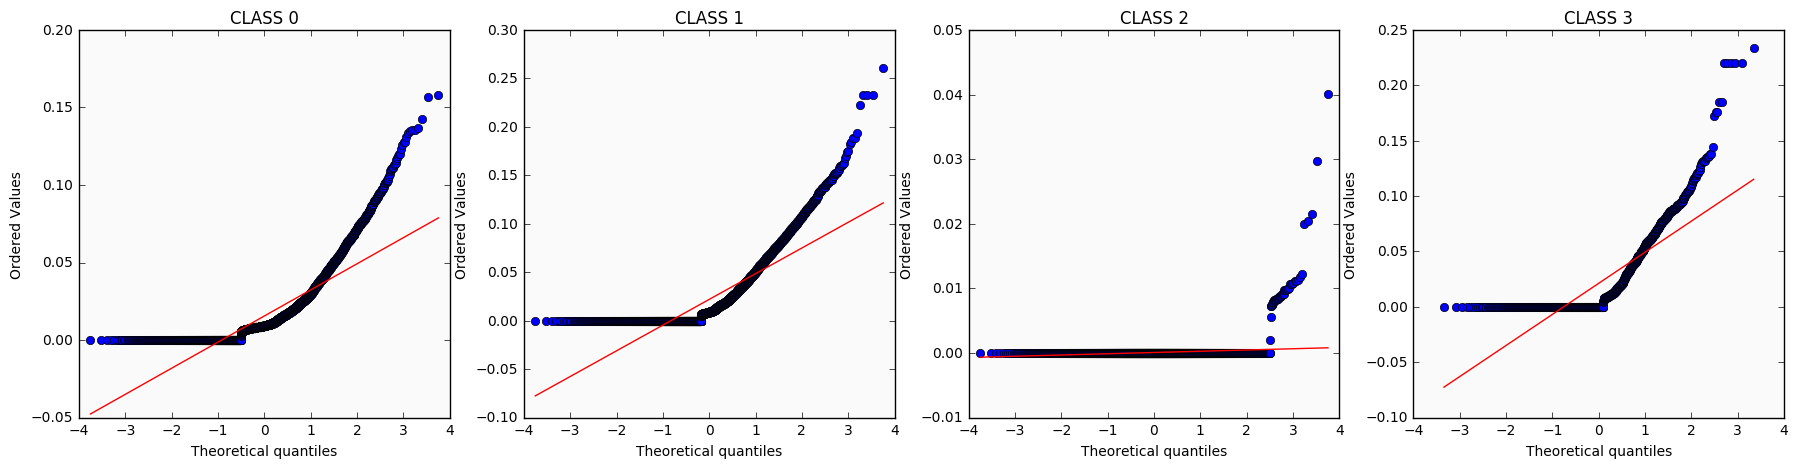

side effect


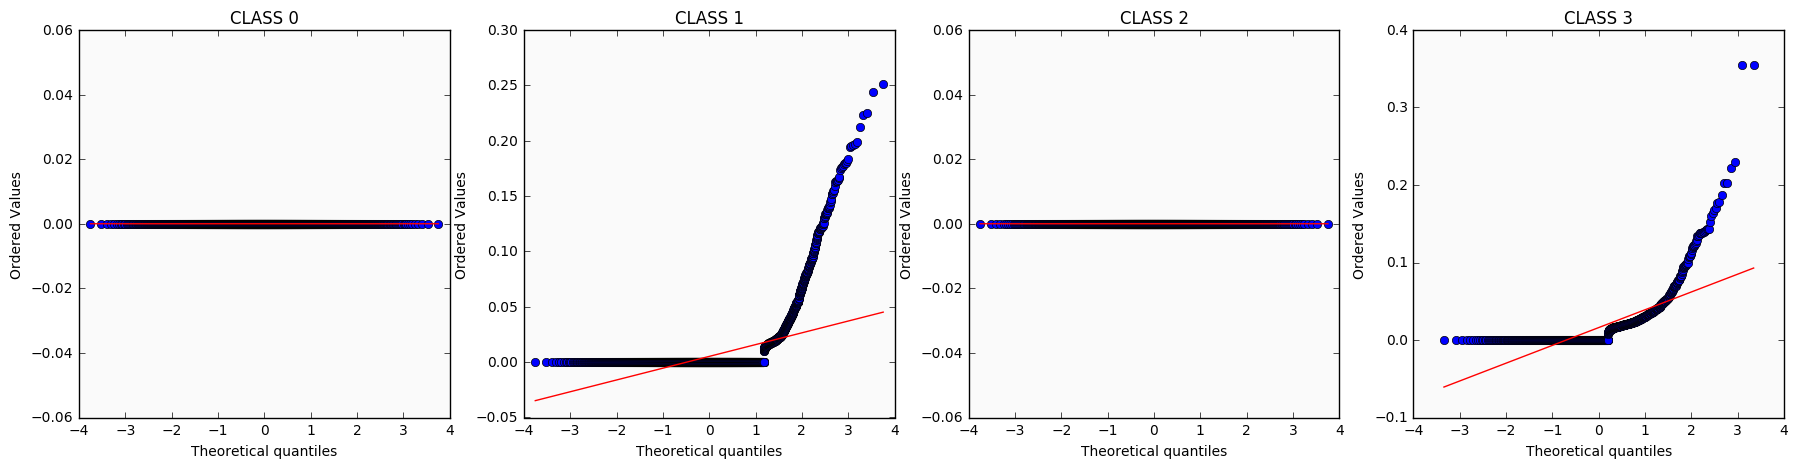

advers


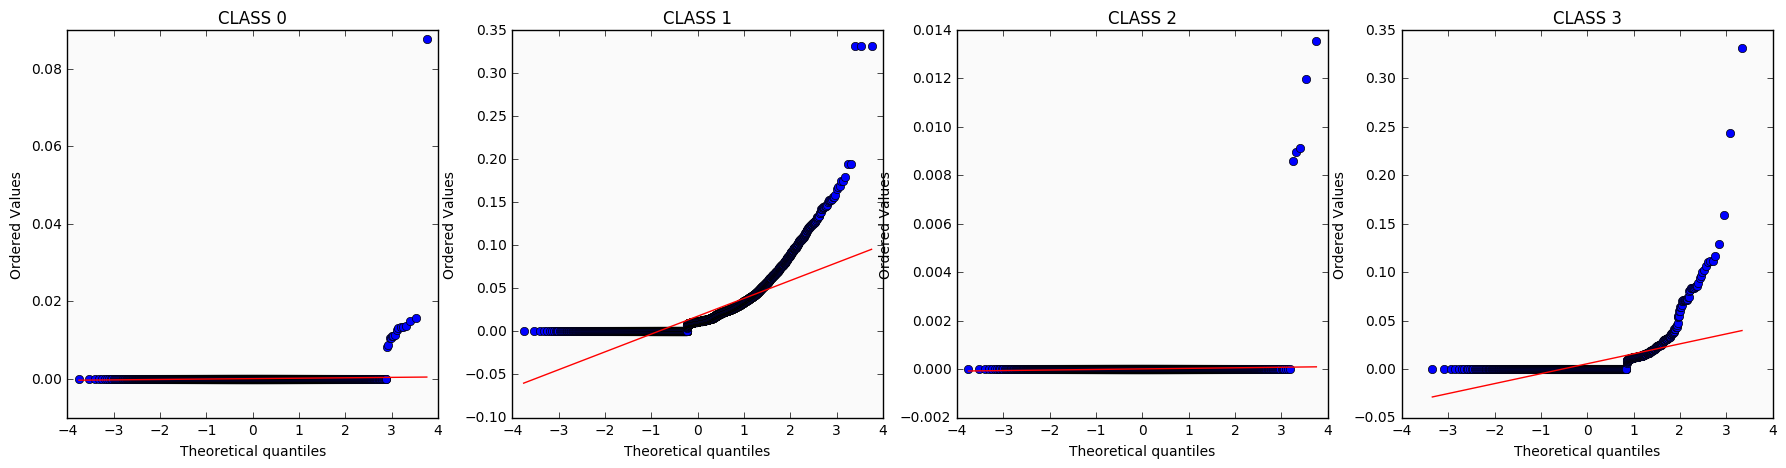

congenit


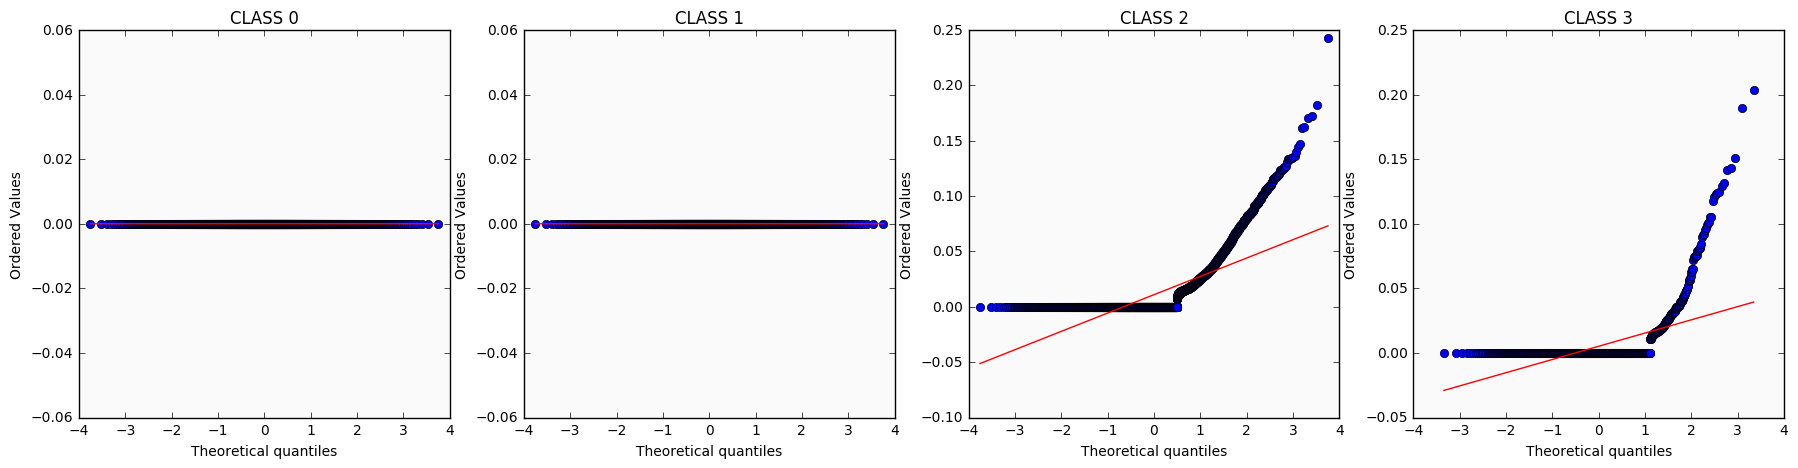

anomali


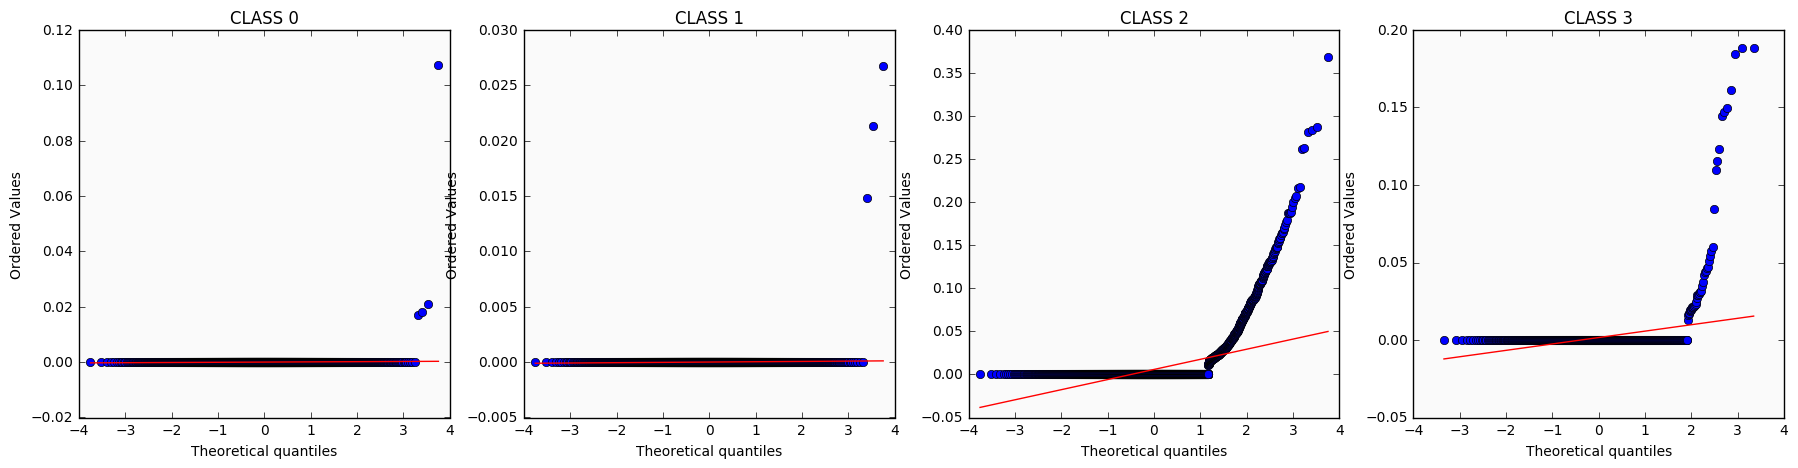

In [109]:
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import probplot

for i_query in range(5):
    print(voc_query[i_query])
    fig = plt.figure(figsize=(22,5))
    for iclass in range(4):
        ax = fig.add_subplot(1,4,iclass+1)
        ax.patch.set_facecolor('#FAFAFA') 
        ind = np.ravel(np.argwhere(y == iclass))
        px = np.ravel(X_query[ind,i_query].todense())
        res = probplot(px, plot=plt)
        ax.set_title('CLASS '+str(iclass), fontsize=12)
    plt.show()
    fig.savefig('./docs/images/probplot_query_'+voc_query[i_query]+'.png')

# 5-fold Cross-Validation

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline

import random

In [20]:
def fit_predict_1(clf, X):
        z = clf.predict(X)
        try:
            Z = clf.predict_proba(X) # soft 
        except AttributeError:
            Z = indices_to_onehot(z) # hard 
        ZZ = indices_to_twobit(z) # dummy
        return z, Z, ZZ
    
def fit_predict_2(clf, X):
        try:
            ZZ = clf.predict_proba(X) # soft 
        except AttributeError:
            ZZ = clf.predict(X) # hard 
        if not isinstance(ZZ, np.ndarray):
            ZZ = ZZ.todense()
        z = twobit_to_indices(ZZ)
        Z = indices_to_onehot(z) # dummy
        return z, Z, ZZ

def fit_predict_4(clf, X):
        try:
            Z = clf.predict_proba(X) # soft 
        except AttributeError:
            Z = clf.predict(X) # hard 
        if not isinstance(Z, np.ndarray):
            Z = Z.todense()
        z = onehot_to_indices(Z)
        ZZ = indices_to_twobit(z) # dummy
        return z, Z, ZZ

def fit_predict(bits, clf, X_train, y_train, X_valid, X_test):
    if bits == 1:
        clf.fit(X_train, y_train)
        
        z_train, Z_train, ZZ_train = fit_predict_1(clf, X_train)
        z_valid, Z_valid, ZZ_valid = fit_predict_1(clf, X_valid)
        z_test, Z_test, ZZ_test = fit_predict_1(clf, X_test)
        
    if bits == 2:
        YY_train = indices_to_twobit(y_train) 
        clf.fit(X_train, YY_train)
                
        z_train, Z_train, ZZ_train = fit_predict_2(clf, X_train)
        z_valid, Z_valid, ZZ_valid = fit_predict_2(clf, X_valid)
        z_test, Z_test, ZZ_test = fit_predict_2(clf, X_test)
        
    if bits == 4:
        Y_train = indices_to_onehot(y_train) 
        clf.fit(X_train, Y_train)
        
        z_train, Z_train, ZZ_train = fit_predict_4(clf, X_train)
        z_valid, Z_valid, ZZ_valid = fit_predict_4(clf, X_valid)
        z_test, Z_test, ZZ_test = fit_predict_4(clf, X_test)

    acc_train = accuracy_score(y_train, z_train) 
    return clf, acc_train, z_valid, Z_valid, ZZ_valid, z_test, Z_test, ZZ_test
    
def train_valid_test(X_train, y_train, Y_train, YY_train,
                     X_valid, y_valid, Y_valid, YY_valid,
                     X_test, y_test, Y_test, YY_test, model):   
    
    imp = np.ones((1,)) # dummy
        
    # Base model
    if "Logistic Regression" in model:
        from sklearn.linear_model import LogisticRegression
        clf_base = LogisticRegression(solver='sag')       
    elif 'Multinomial Naive Bayes' in model:  
        from sklearn.naive_bayes import MultinomialNB
        clf_base = MultinomialNB()
    elif 'SGD' in model:
        from sklearn.linear_model import SGDClassifier
        clf_base = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
    elif 'FF' in model:
        from sklearn.neural_network import MLPClassifier
        clf_base = MLPClassifier(hidden_layer_sizes=(10, 10, 10), solver='adam', 
                            learning_rate='adaptive', learning_rate_init=0.01, alpha=0.01, 
                            max_iter=len(y_train)*10, random_state=1)
    elif 'Decision Tree' in model:  
        from sklearn import tree
        clf_base = tree.DecisionTreeClassifier(random_state=0)
    elif 'XGB' in model:  
        from xgboost import XGBClassifier
        clf_base = XGBClassifier(random_state=0)
    elif 'KNN' in model:
        from sklearn.neighbors import KNeighborsClassifier
        random.seed(30)
        clf_base = KNeighborsClassifier(n_neighbors=2)
    elif 'MLkNN' in model:  
        from skmultilearn.adapt import MLkNN
        random.seed(30)
        clf_base = MLkNN(k=2)
    else:
        print("WARNING: Base classifier not specified in parameter model={}, will be using Logistic Regression".format(model))
        clf_base = LogisticRegression(solver='sag')       

    # Problem formulation
    if "one-vs-rest" in model:
        from sklearn.multiclass import OneVsRestClassifier 
        clf = OneVsRestClassifier(clf_base, n_jobs=-1)
    elif "chain" in model:
        if "bit" in model:
            from sklearn.multioutput import ClassifierChain
            clf = ClassifierChain(clf_base, order='random', random_state=1)
        else:
            print("WARNING: Chain classifier requires 2 or more outputs, only 1 output is provided, switching to base classifier")
            clf = clf_base
    else:
        clf = clf_base
        
    # Train model and predict
    if "2-bit" in model:
        clf, acc_train, z_valid, Z_valid, ZZ_valid, z_test, Z_test, ZZ_test = fit_predict(2, clf, X_train, y_train, X_valid, X_test)
    elif "4-bit" in model:
        clf, acc_train, z_valid, Z_valid, ZZ_valid, z_test, Z_test, ZZ_test = fit_predict(4, clf, X_train, y_train, X_valid, X_test)
    else: 
        clf, acc_train, z_valid, Z_valid, ZZ_valid, z_test, Z_test, ZZ_test = fit_predict(1, clf, X_train, y_train, X_valid, X_test)
            
    # feature importances
    if ('XGB' in model) & ('bit' not in model):  
        imp = clf.feature_importances_ 
    
    return acc_train, z_valid, Z_valid, ZZ_valid, z_test, Z_test, ZZ_test, imp

In [21]:
from sklearn.metrics import accuracy_score
def crossvalid_test_report(y, z, Z, y_test, z_test, Z_test, n_inputs, model, verbose=0):
    # Accuracy TODO: use Y and Z for multi-label classification
    acc = accuracy_score(y, z) 
    acc_test = accuracy_score(y_test, z_test) 
    
    d = classification_report(y, z, output_dict=True)
    acc3 = d['3']['f1-score']
    d = classification_report(y_test, z_test, output_dict=True)
    acc3_test = d['3']['f1-score']    

    if verbose >= 2:
        # Report and confusion matrix
        print('*******'+ (model+", "+str(n_inputs)+' inputs').center(40) +'******')
        print('*************'+ ('5-fold CV accuracy='+"{:.2f}".format(acc)).center(28) +'************')
        print(classification_report(y, z))
        print(confusion_matrix(y, z))

        print('*************'+ ('TEST accuracy='+"{:.2f}".format(acc_test)).center(28) +'************')
        print(classification_report(y_test, z_test))
        print(confusion_matrix(y_test, z_test))
    
    if verbose >= 1:
        # Line for HTML result table
        print('<tr><td>{0}<td>{1:.0f}<td>{2:.2f}<td>{3:.2f}<td>{4:.2f}<td>{5:.2f}'.format(model, n_inputs, acc, acc_test, acc3, acc3_test))
    return acc, acc_test

In [22]:
z = np.zeros((len(y),), dtype=int)
Z = np.zeros((len(y),4), dtype=int)
ZZ = np.zeros((len(y),2), dtype=int)

In [23]:
def crossvalid_test(X, y, Y, YY, X_test, y_test, Y_test, YY_test, model, verbose=1, oversample=True):

    if verbose >= 1:
        print('model=', model)

    Z_test = np.zeros((len(y_test),4))
    ZZ_test = np.zeros((len(y_test),2))
     
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    for ifold, (train_index, valid_index) in enumerate(kf.split(X)):
        if oversample == True:
            # Over-sample minority class 3
            ind = np.repeat(np.ravel(train_index[np.argwhere(y[train_index] == 3)]), 5)
            train_index = np.concatenate((train_index, ind))
        
        # Prepare 2 datasets
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        Y_train, Y_valid = Y[train_index], Y[valid_index]   
        YY_train, YY_valid = YY[train_index], YY[valid_index]   

        # Train and test model(s)        
        acc_train, z[valid_index], Z[valid_index], ZZ[valid_index], z_te, Z_te, ZZ_te, imp = train_valid_test(
                                                                X_train, y_train, Y_train, YY_train,
                                                                X_valid, y_valid, Y_valid, YY_valid,
                                                                X_test, y_test, Y_test, YY_test, model)

        # Accumulate votes: hard (0/1) or soft (class probabilities in [0,1])
        Z_test = Z_test + Z_te
        ZZ_test = ZZ_test + ZZ_te
        
        # Accumulate importances
        if ifold == 0:
            importance = np.zeros((imp.shape[0],))
        importance = importance + imp
        
        if verbose >= 1:
            acc_va = accuracy_score(y[valid_index], z[valid_index])
            print('Fold {0}/5 accuracy train={1:.2f} valid={2:.2f}'.format(ifold, acc_train, acc_va ))
        if verbose >= 3:
            print(sorted(Counter(y_train).items())) # Count classes
            print(X_valid.shape) # n.of valid
            print(confusion_matrix(y[valid_index], z[valid_index])) # errors
      
    # Vote
    z_test = onehot_to_indices(Z_test)
    zz_test = twobit_to_indices(ZZ_test)
    
    # Print report
    acc, acc_test = crossvalid_test_report(y, z, Z, y_test, z_test, Z_test, X.shape[1], model, verbose)
    
    # Save importances to file
    if importance.shape[0] > 1:
        imp_df = pd.DataFrame({'importance': imp})
        imp_df.to_csv('./importance_'+str(importance.shape[0])+'.csv', sep='\t', index=False)
    
    return acc, acc_test, z, z_test, Z_test, ZZ_test, importance

# Models using sparse BOW with TF-IDF (5 query words)

In [158]:
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_query, y, Y, YY, X_test_query, y_test, Y_test, YY_test, 
                                                            model="Decision Tree")
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_query, y, Y, YY, X_test_query, y_test, Y_test, YY_test, 
                                                            model="XGB")

model= Decision Tree
Fold 0/5 accuracy train=0.81 valid=0.69
Fold 1/5 accuracy train=0.81 valid=0.71
Fold 2/5 accuracy train=0.81 valid=0.71
Fold 3/5 accuracy train=0.81 valid=0.69
Fold 4/5 accuracy train=0.81 valid=0.69
<tr><td>Decision Tree<td>5<td>0.70<td>0.71<td>0.34<td>0.33
model= XGB
Fold 0/5 accuracy train=0.68 valid=0.72
Fold 1/5 accuracy train=0.68 valid=0.72
Fold 2/5 accuracy train=0.68 valid=0.72
Fold 3/5 accuracy train=0.68 valid=0.71
Fold 4/5 accuracy train=0.68 valid=0.71
<tr><td>XGB<td>5<td>0.72<td>0.72<td>0.43<td>0.43


In [163]:
for sbase in ['Logistic Regression', 'Multinomial Naive Bayes', 'SGD', 'FF', 'Decision Tree', 'XGB']:
    for sframe in ['one-vs-rest', 'chain']:
        for slabel in ['2-bit', '4-bit']:
            acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(X_query, y, Y, YY, X_test_query, y_test, Y_test, YY_test, 
                                                            model=sbase+" "+sframe+" "+slabel)

model= XGB one-vs-rest 2-bit
Fold 0/5 accuracy train=0.67 valid=0.70
Fold 1/5 accuracy train=0.67 valid=0.70
Fold 2/5 accuracy train=0.67 valid=0.72
Fold 3/5 accuracy train=0.67 valid=0.69
Fold 4/5 accuracy train=0.66 valid=0.70
<tr><td>XGB one-vs-rest 2-bit<td>5<td>0.70<td>0.70<td>0.44<td>0.45
model= XGB one-vs-rest 4-bit
Fold 0/5 accuracy train=0.68 valid=0.72
Fold 1/5 accuracy train=0.68 valid=0.72
Fold 2/5 accuracy train=0.68 valid=0.72
Fold 3/5 accuracy train=0.68 valid=0.71
Fold 4/5 accuracy train=0.68 valid=0.71
<tr><td>XGB one-vs-rest 4-bit<td>5<td>0.72<td>0.73<td>0.43<td>0.44
model= XGB chain 2-bit
Fold 0/5 accuracy train=0.67 valid=0.70
Fold 1/5 accuracy train=0.67 valid=0.70
Fold 2/5 accuracy train=0.68 valid=0.71
Fold 3/5 accuracy train=0.68 valid=0.69
Fold 4/5 accuracy train=0.67 valid=0.69
<tr><td>XGB chain 2-bit<td>5<td>0.70<td>0.70<td>0.39<td>0.40
model= XGB chain 4-bit
Fold 0/5 accuracy train=0.68 valid=0.72
Fold 1/5 accuracy train=0.68 valid=0.72
Fold 2/5 accuracy tra

In [164]:
acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(X_query, y, Y, YY, X_test_query, y_test, Y_test, YY_test, 
                                                            model="KNN")

model= KNN
Fold 0/5 accuracy train=0.71 valid=0.62
Fold 1/5 accuracy train=0.71 valid=0.60
Fold 2/5 accuracy train=0.71 valid=0.61
Fold 3/5 accuracy train=0.71 valid=0.60
Fold 4/5 accuracy train=0.71 valid=0.61
<tr><td>KNN<td>5<td>0.61<td>0.61<td>0.34<td>0.35


# Models using sparse BOW with TF-IDF (45597 pruned)


In [169]:
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_pruned, y, Y, YY, X_test_pruned, y_test, Y_test, YY_test, 
                                                            model="Decision Tree")
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_pruned, y, Y, YY, X_test_pruned, y_test, Y_test, YY_test, 
                                                            model="XGB")

model= Decision Tree
Fold 0/5 accuracy train=1.00 valid=0.81
Fold 1/5 accuracy train=1.00 valid=0.81
Fold 2/5 accuracy train=1.00 valid=0.81
Fold 3/5 accuracy train=1.00 valid=0.82
Fold 4/5 accuracy train=1.00 valid=0.81
<tr><td>Decision Tree<td>45597<td>0.81<td>0.85<td>0.52<td>0.61
model= XGB
Fold 0/5 accuracy train=0.84 valid=0.84
Fold 1/5 accuracy train=0.84 valid=0.84
Fold 2/5 accuracy train=0.84 valid=0.83
Fold 3/5 accuracy train=0.84 valid=0.83
Fold 4/5 accuracy train=0.83 valid=0.83
<tr><td>XGB<td>45597<td>0.83<td>0.84<td>0.61<td>0.63


In [171]:
for sbase in ['Logistic Regression', 'Multinomial Naive Bayes', 'SGD', 'FF', 'Decision Tree']:
    for sframe in ['one-vs-rest', 'chain']:
        for slabel in ['2-bit', '4-bit']:
            acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(X_pruned, y, Y, YY, X_test_pruned, y_test, Y_test, YY_test, 
                                                            model=sbase+" "+sframe+" "+slabel)

model= Logistic Regression one-vs-rest 2-bit
Fold 0/5 accuracy train=0.90 valid=0.86
Fold 1/5 accuracy train=0.89 valid=0.86
Fold 2/5 accuracy train=0.90 valid=0.85
Fold 3/5 accuracy train=0.90 valid=0.86
Fold 4/5 accuracy train=0.90 valid=0.86
<tr><td>Logistic Regression one-vs-rest 2-bit<td>45597<td>0.86<td>0.86<td>0.70<td>0.70
model= Logistic Regression one-vs-rest 4-bit
Fold 0/5 accuracy train=0.90 valid=0.86
Fold 1/5 accuracy train=0.90 valid=0.87
Fold 2/5 accuracy train=0.91 valid=0.85
Fold 3/5 accuracy train=0.91 valid=0.86
Fold 4/5 accuracy train=0.91 valid=0.86
<tr><td>Logistic Regression one-vs-rest 4-bit<td>45597<td>0.86<td>0.86<td>0.67<td>0.68
model= Logistic Regression chain 2-bit
Fold 0/5 accuracy train=0.90 valid=0.85
Fold 1/5 accuracy train=0.89 valid=0.86
Fold 2/5 accuracy train=0.90 valid=0.85
Fold 3/5 accuracy train=0.90 valid=0.86
Fold 4/5 accuracy train=0.90 valid=0.86
<tr><td>Logistic Regression chain 2-bit<td>45597<td>0.86<td>0.86<td>0.68<td>0.68
model= Logistic 

# Models using sparse BOW with TF-IDF (all 4714274)

In [173]:
for sbase in ['Logistic Regression', 'Multinomial Naive Bayes', 'SGD']:
    for sframe in ['one-vs-rest', 'chain']:
        for slabel in ['2-bit', '4-bit']:
            acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(X, y, Y, YY, X_test, y_test, Y_test, YY_test, 
                                                            model=sbase+" "+sframe+" "+slabel)

model= Logistic Regression one-vs-rest 2-bit
Fold 0/5 accuracy train=0.96 valid=0.86
Fold 1/5 accuracy train=0.96 valid=0.87
Fold 2/5 accuracy train=0.96 valid=0.85
Fold 3/5 accuracy train=0.96 valid=0.87
Fold 4/5 accuracy train=0.96 valid=0.86
<tr><td>Logistic Regression one-vs-rest 2-bit<td>4714274<td>0.86<td>0.87<td>0.71<td>0.72
model= Logistic Regression one-vs-rest 4-bit
Fold 0/5 accuracy train=0.97 valid=0.86
Fold 1/5 accuracy train=0.97 valid=0.87
Fold 2/5 accuracy train=0.97 valid=0.85
Fold 3/5 accuracy train=0.97 valid=0.87
Fold 4/5 accuracy train=0.97 valid=0.87
<tr><td>Logistic Regression one-vs-rest 4-bit<td>4714274<td>0.87<td>0.87<td>0.71<td>0.72
model= Logistic Regression chain 2-bit
Fold 0/5 accuracy train=0.96 valid=0.86
Fold 1/5 accuracy train=0.96 valid=0.87
Fold 2/5 accuracy train=0.96 valid=0.86
Fold 3/5 accuracy train=0.96 valid=0.87
Fold 4/5 accuracy train=0.96 valid=0.86
<tr><td>Logistic Regression chain 2-bit<td>4714274<td>0.86<td>0.87<td>0.71<td>0.71
model= Log

# Models using sparse BOW with TF-IDF (419 best)

In [28]:
for sbase in ['Logistic Regression', 'Multinomial Naive Bayes', 'SGD', 'FF', 'Decision Tree', 'XGB']:
    for sframe in ['one-vs-rest', 'chain']:
        for slabel in ['2-bit', '4-bit']:
            acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(X_best, y, Y, YY, X_test_best, y_test, Y_test, YY_test, 
                                                            model=sbase+" "+sframe+" "+slabel)

model= Logistic Regression one-vs-rest 2-bit
Fold 0/5 accuracy train=0.79 valid=0.83
Fold 1/5 accuracy train=0.80 valid=0.82
Fold 2/5 accuracy train=0.80 valid=0.81
Fold 3/5 accuracy train=0.80 valid=0.82
Fold 4/5 accuracy train=0.80 valid=0.81
<tr><td>Logistic Regression one-vs-rest 2-bit<td>419<td>0.82<td>0.82<td>0.62<td>0.62
model= Logistic Regression one-vs-rest 4-bit
Fold 0/5 accuracy train=0.81 valid=0.83
Fold 1/5 accuracy train=0.81 valid=0.82
Fold 2/5 accuracy train=0.81 valid=0.81
Fold 3/5 accuracy train=0.81 valid=0.82
Fold 4/5 accuracy train=0.81 valid=0.81
<tr><td>Logistic Regression one-vs-rest 4-bit<td>419<td>0.82<td>0.82<td>0.59<td>0.60
model= Logistic Regression chain 2-bit
Fold 0/5 accuracy train=0.80 valid=0.82
Fold 1/5 accuracy train=0.80 valid=0.81
Fold 2/5 accuracy train=0.80 valid=0.80
Fold 3/5 accuracy train=0.80 valid=0.81
Fold 4/5 accuracy train=0.80 valid=0.81
<tr><td>Logistic Regression chain 2-bit<td>419<td>0.81<td>0.81<td>0.59<td>0.58
model= Logistic Regres

In [29]:
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_best, y, Y, YY, X_test_best, y_test, Y_test, YY_test, 
                                                            model="Decision Tree")
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(X_best, y, Y, YY, X_test_best, y_test, Y_test, YY_test, 
                                                            model="XGB")

model= Decision Tree
Fold 0/5 accuracy train=0.99 valid=0.80
Fold 1/5 accuracy train=0.99 valid=0.81
Fold 2/5 accuracy train=0.99 valid=0.80
Fold 3/5 accuracy train=0.99 valid=0.81
Fold 4/5 accuracy train=0.99 valid=0.81
<tr><td>Decision Tree<td>419<td>0.81<td>0.84<td>0.51<td>0.61
model= XGB
Fold 0/5 accuracy train=0.84 valid=0.84
Fold 1/5 accuracy train=0.84 valid=0.84
Fold 2/5 accuracy train=0.84 valid=0.83
Fold 3/5 accuracy train=0.84 valid=0.83
Fold 4/5 accuracy train=0.83 valid=0.83
<tr><td>XGB<td>419<td>0.83<td>0.84<td>0.61<td>0.63


# Models using dense Doc2Vec embeddings (400)

In [30]:
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(V, y, Y, YY, V_test, y_test, Y_test, YY_test, 
                                                            model="Decision Tree")
acc, acc_test, z, z_test, Z_test, ZZ_test, imp = crossvalid_test(V, y, Y, YY, V_test, y_test, Y_test, YY_test, 
                                                            model="XGB")

model= Decision Tree
Fold 0/5 accuracy train=1.00 valid=0.46
Fold 1/5 accuracy train=1.00 valid=0.49
Fold 2/5 accuracy train=1.00 valid=0.47
Fold 3/5 accuracy train=1.00 valid=0.47
Fold 4/5 accuracy train=1.00 valid=0.48
<tr><td>Decision Tree<td>400<td>0.47<td>0.56<td>0.23<td>0.27
model= XGB
Fold 0/5 accuracy train=0.83 valid=0.75
Fold 1/5 accuracy train=0.83 valid=0.74
Fold 2/5 accuracy train=0.83 valid=0.74
Fold 3/5 accuracy train=0.83 valid=0.73
Fold 4/5 accuracy train=0.83 valid=0.74
<tr><td>XGB<td>400<td>0.74<td>0.75<td>0.48<td>0.49


In [32]:
for sbase in ['SGD', 'FF', 'Decision Tree', 'XGB']: #'Logistic Regression'
    for sframe in ['one-vs-rest', 'chain']:
        for slabel in ['2-bit', '4-bit']:
            acc, acc_test, z, z_test, Z_test, ZZ_test, _ = crossvalid_test(V, y, Y, YY, V_test, y_test, Y_test, YY_test, 
                                                            model=sbase+" "+sframe+" "+slabel)

model= SGD one-vs-rest 2-bit
Fold 0/5 accuracy train=0.81 valid=0.79
Fold 1/5 accuracy train=0.81 valid=0.79
Fold 2/5 accuracy train=0.81 valid=0.78
Fold 3/5 accuracy train=0.81 valid=0.78
Fold 4/5 accuracy train=0.81 valid=0.78
<tr><td>SGD one-vs-rest 2-bit<td>400<td>0.79<td>0.80<td>0.52<td>0.53
model= SGD one-vs-rest 4-bit
Fold 0/5 accuracy train=0.80 valid=0.80
Fold 1/5 accuracy train=0.81 valid=0.80
Fold 2/5 accuracy train=0.82 valid=0.80
Fold 3/5 accuracy train=0.82 valid=0.80
Fold 4/5 accuracy train=0.80 valid=0.80
<tr><td>SGD one-vs-rest 4-bit<td>400<td>0.80<td>0.83<td>0.61<td>0.60
model= SGD chain 2-bit
Fold 0/5 accuracy train=0.81 valid=0.79
Fold 1/5 accuracy train=0.81 valid=0.79
Fold 2/5 accuracy train=0.82 valid=0.78
Fold 3/5 accuracy train=0.81 valid=0.78
Fold 4/5 accuracy train=0.81 valid=0.78
<tr><td>SGD chain 2-bit<td>400<td>0.78<td>0.79<td>0.51<td>0.51
model= SGD chain 4-bit
Fold 0/5 accuracy train=0.84 valid=0.83
Fold 1/5 accuracy train=0.84 valid=0.82
Fold 2/5 accura

# XGB word importances

In [24]:
imp = pd.read_csv('./importance_45597.csv').importance.values
print("importances, total=", imp.shape)

importances, total= (45597,)


In [25]:
ind = np.argwhere(imp > 0)[:,0] # n.of non-zero importances
print("importances, non-zero=", ind.shape[0])

imp_isort = (-imp).argsort()
for j in range(0,ind.shape[0]):
    print(voc_pruned[imp_isort[j]]+"\t\t\t"+str(imp[imp_isort[j]]))

importances, non-zero= 419
drug			0.059150457000000004
advers			0.03811036
congenit			0.037316397
side			0.034537517000000004
side effect			0.024215959
reaction			0.022231044
syndrom			0.02183406
toxic			0.019849146
qt			0.018261215
advers affect			0.01746725
pregnanc			0.015879318
safeti			0.01349742
prolong			0.013100437
abnorm			0.012703454
effect			0.01230647
medic			0.011115522
patient			0.011115522
relat			0.010718539
activ			0.010718539
defect			0.009924573
cancer			0.00952759
teratogen			0.00952759
malform			0.009130606999999999
resist			0.008336642
use			0.007939659
chemotherapi			0.007542676
advers drug			0.00674871
liver injuri			0.00674871
aim			0.00674871
target			0.006351727
surgic			0.006351727
event			0.006351727
studi			0.006351727
birth			0.0059547440000000005
vaccin			0.0059547440000000005
pathogen variant			0.005557761
clinic appar			0.005557761
mutat			0.0051607783
diagnosi			0.0051607783
therapi			0.0051607783
case			0.004763795
dilat			0.004763795
provid			0.0047

In [26]:
index_best = index_pruned[imp_isort[0:ind.shape[0]]] 

X_best = X[:,index_best]
X_test_best = X_test[:,index_best]
print(X_best.shape)

voc_best = [voc[i] for i in list(index_best)]
print(voc_best[0:10])

(25630, 419)
['drug', 'advers', 'congenit', 'side', 'side effect', 'reaction', 'syndrom', 'toxic', 'qt', 'advers affect']


In [92]:
print(voc_query)

['drug', 'side effect', 'advers', 'congenit', 'anomali']


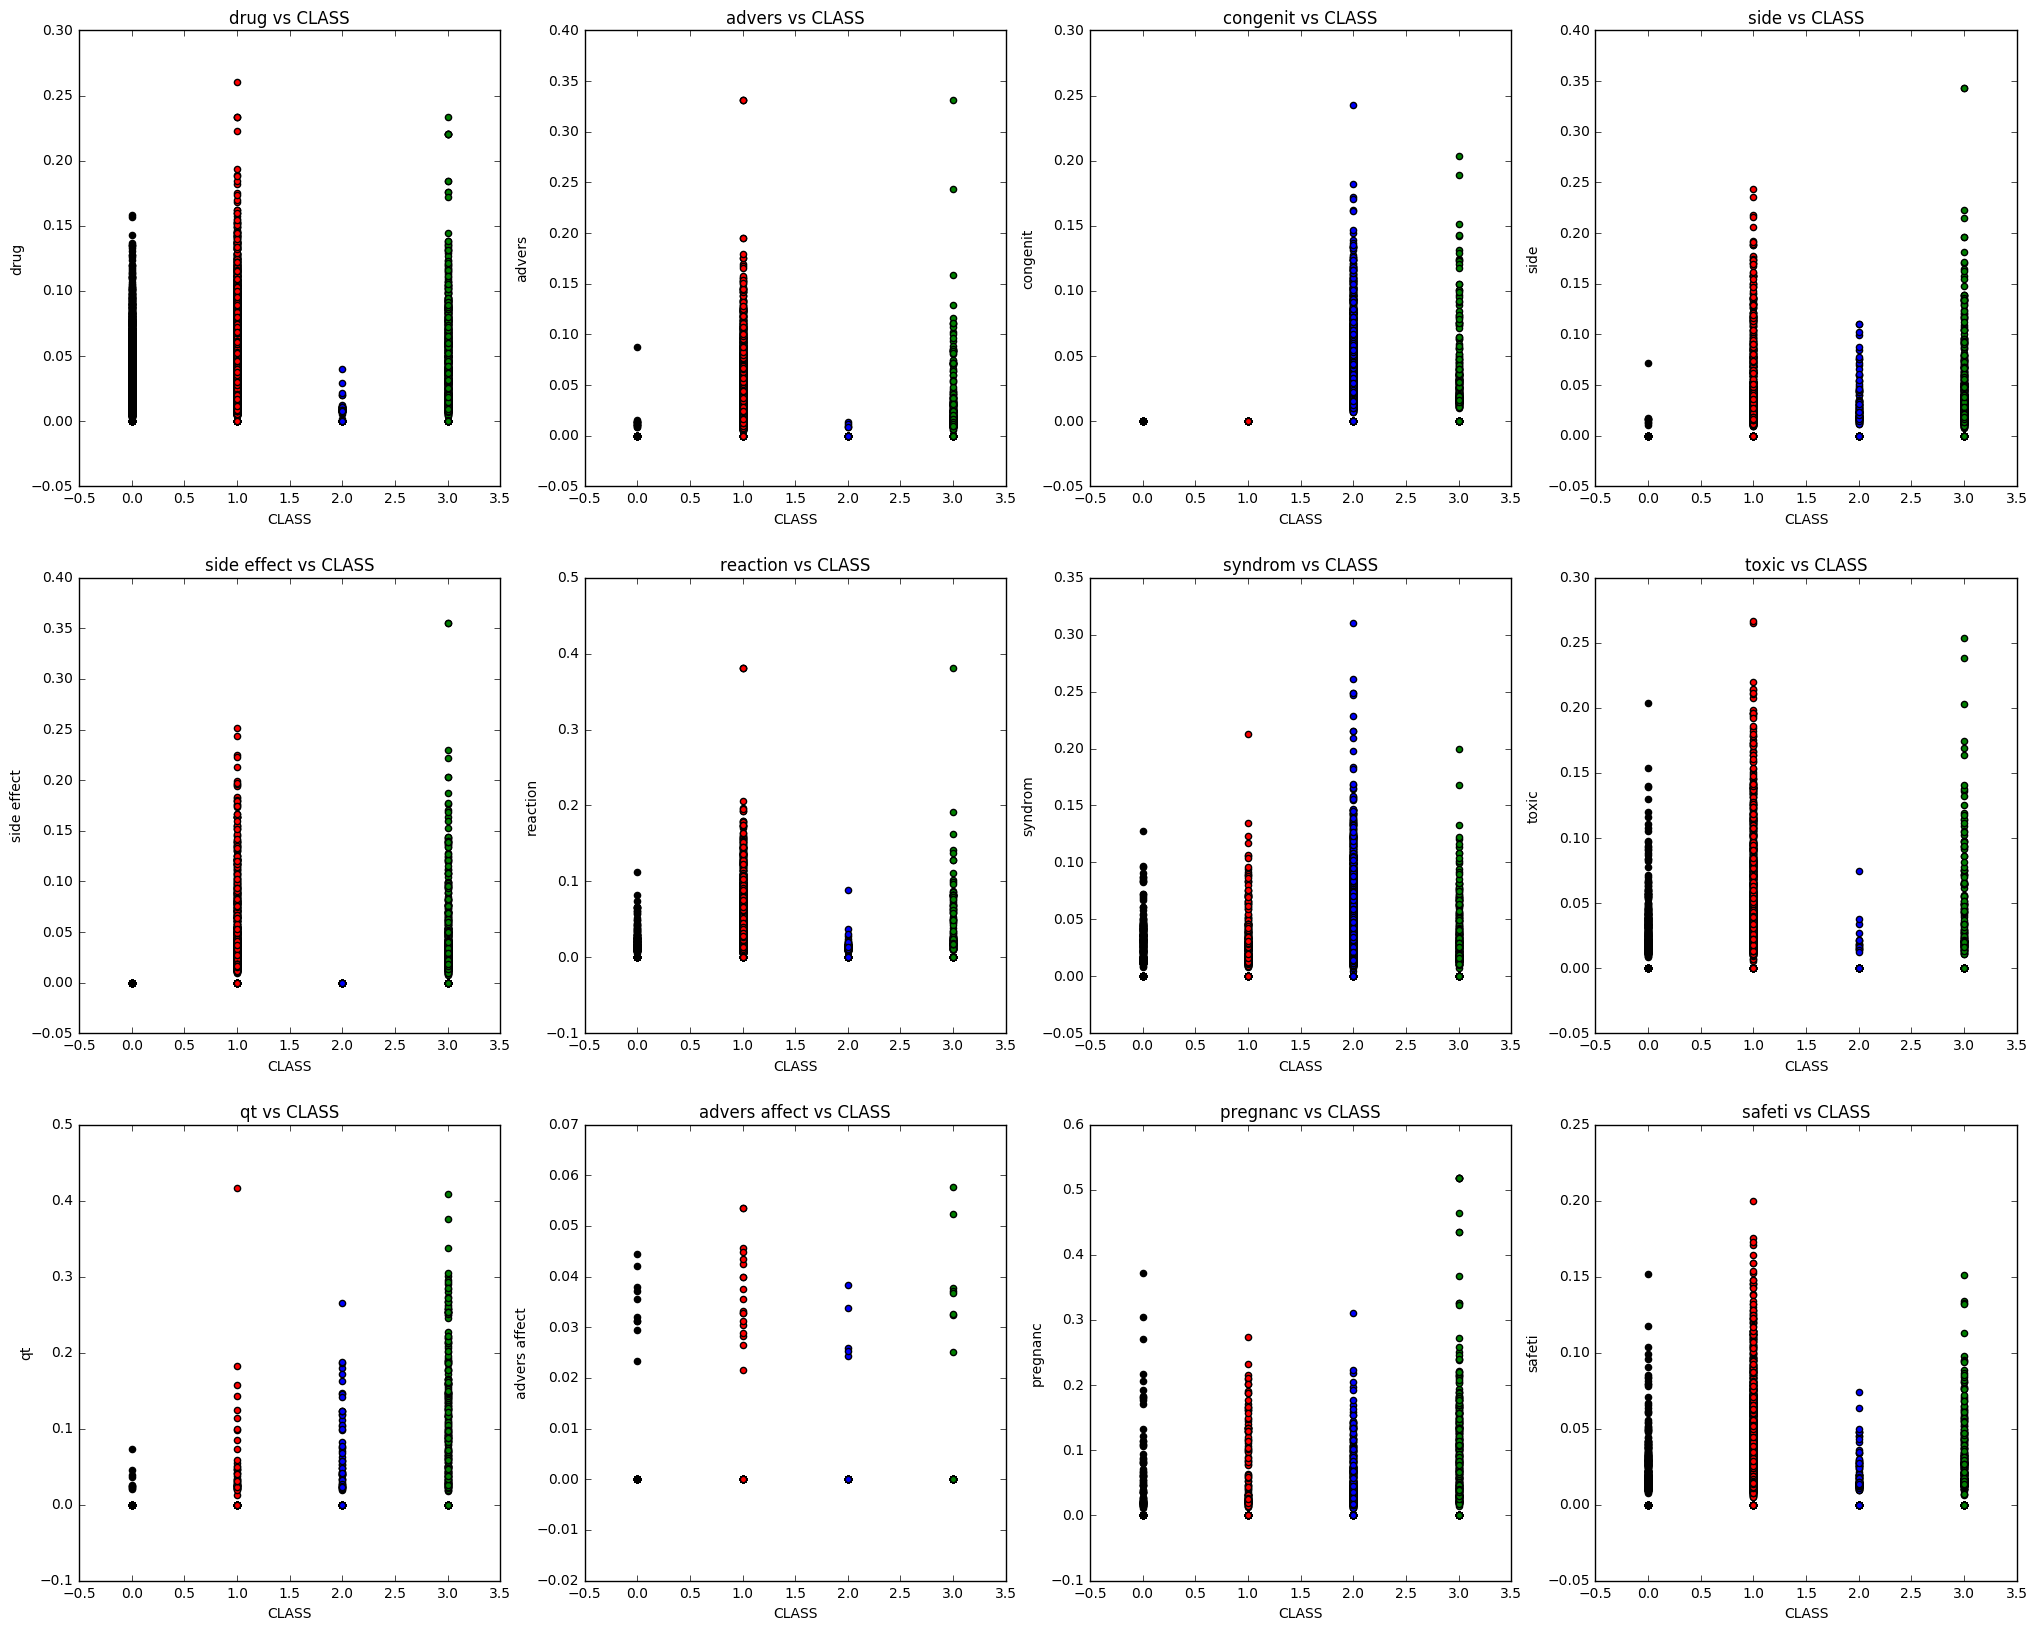

In [127]:
import matplotlib.pyplot as plt
% matplotlib inline

colors = ["black", "red", "blue", "green"]

fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i_best in range(12):
    ax = fig.add_subplot(3, 4, i_best+1)
    ax.set_title(voc_best[i_best] + ' vs CLASS', fontsize=12)
    ax.set_xlabel('CLASS')
    ax.set_ylabel(voc_best[i_best])    
    for iclass in range(4):
        ind = np.ravel(np.argwhere(y == iclass))
        ax.scatter(y[ind], X_best[ind,i_best].todense(), facecolor=colors[iclass])
plt.show()
fig.savefig('./docs/images/4classes_12_best_words.png')

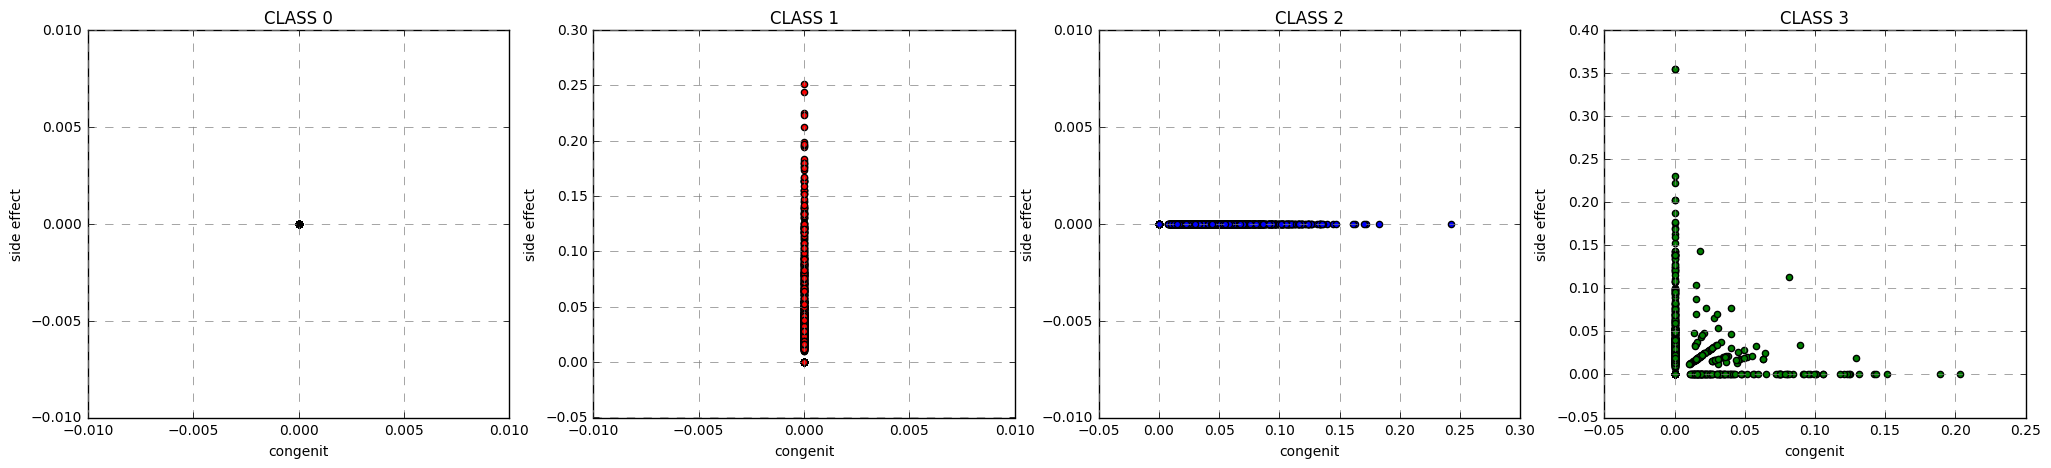

In [126]:
ix_best = 2
iy_best = 4

fig = plt.figure(figsize=(25,5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for iclass in range(4):
    ax = fig.add_subplot(1, 4, iclass+1)
    ax.set_title('CLASS '+str(iclass), fontsize=12)
    ax.grid(b=True, which='major', color='grey', linestyle='--')
    ax.set_xlabel(voc_best[ix_best])
    ax.set_ylabel(voc_best[iy_best])    
    ind = np.ravel(np.argwhere(y == iclass))
    px = np.ravel(X_best[ind,ix_best].todense())
    py = np.ravel(X_best[ind,iy_best].todense())
    ax.scatter(px, py, facecolor=colors[iclass])
plt.show()
fig.savefig('./docs/images/4classes_'+voc_best[ix_best]+'_vs_'+voc_best[iy_best]+'.png')

# Word clouds: original vs TF-IDF

## Original word frequencies (before TF-IDF)

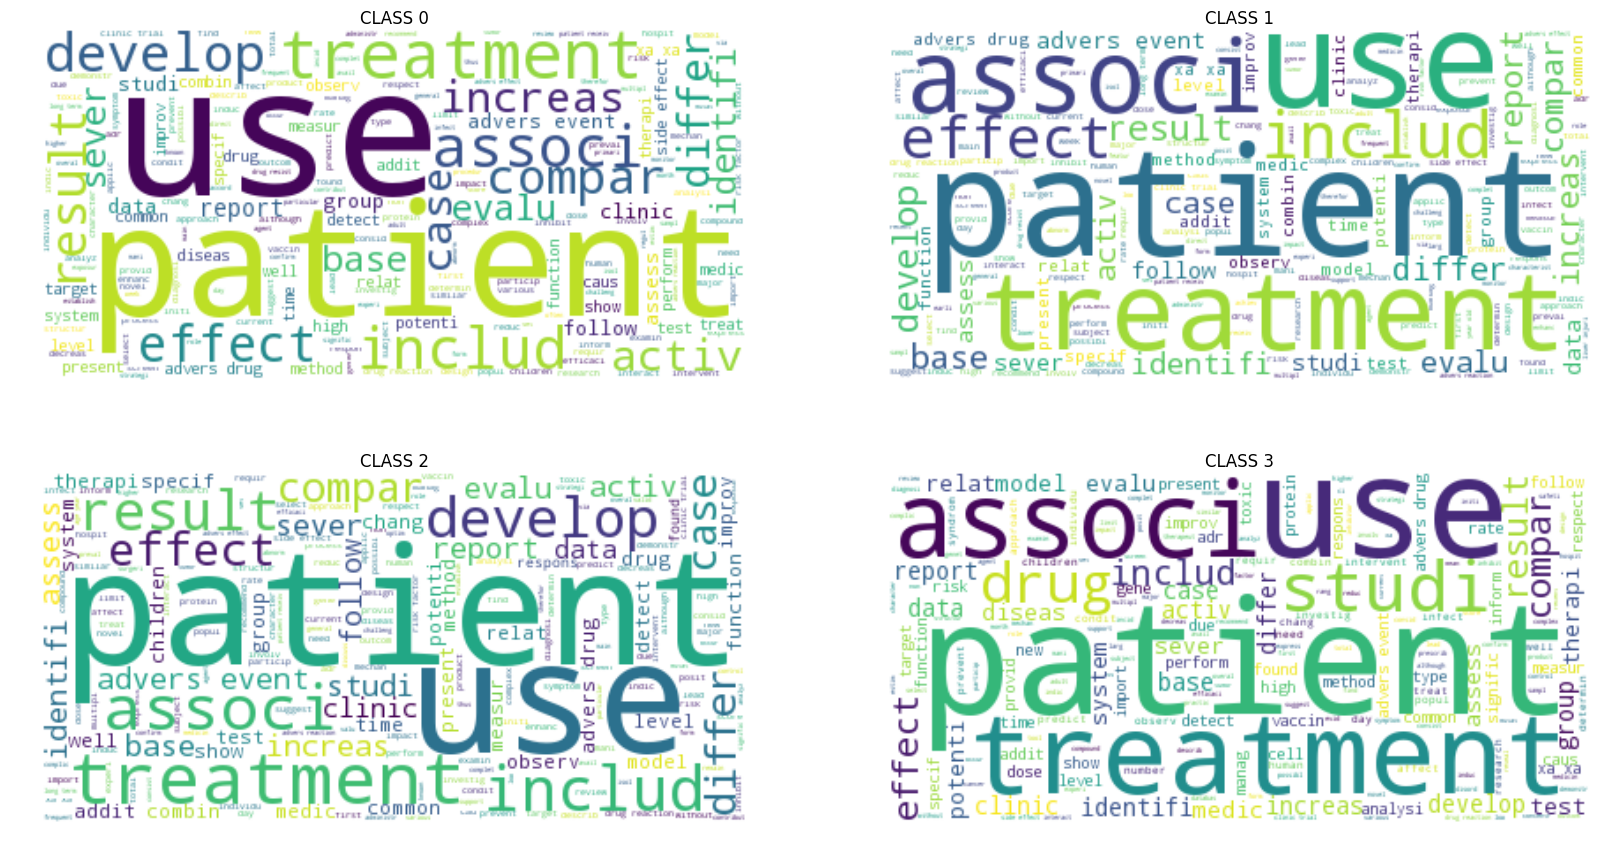

In [203]:
from wordcloud import WordCloud, ImageColorGenerator

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=-0.6, wspace=0.2)
for iclass in range(4):
    ind = list(np.ravel(np.argwhere(y == iclass)))
    text = ''
    for i in ind:
        text = text + " " + docs[i]
    wordcloud = WordCloud(background_color="white").generate(text)
    
    ax = fig.add_subplot(2,2,iclass+1)
    ax.set_title('CLASS '+str(iclass), fontsize=12)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    
plt.show()
fig.savefig('./docs/images/wordcloud.png')

## Word frequencies after TF-IDF normalization

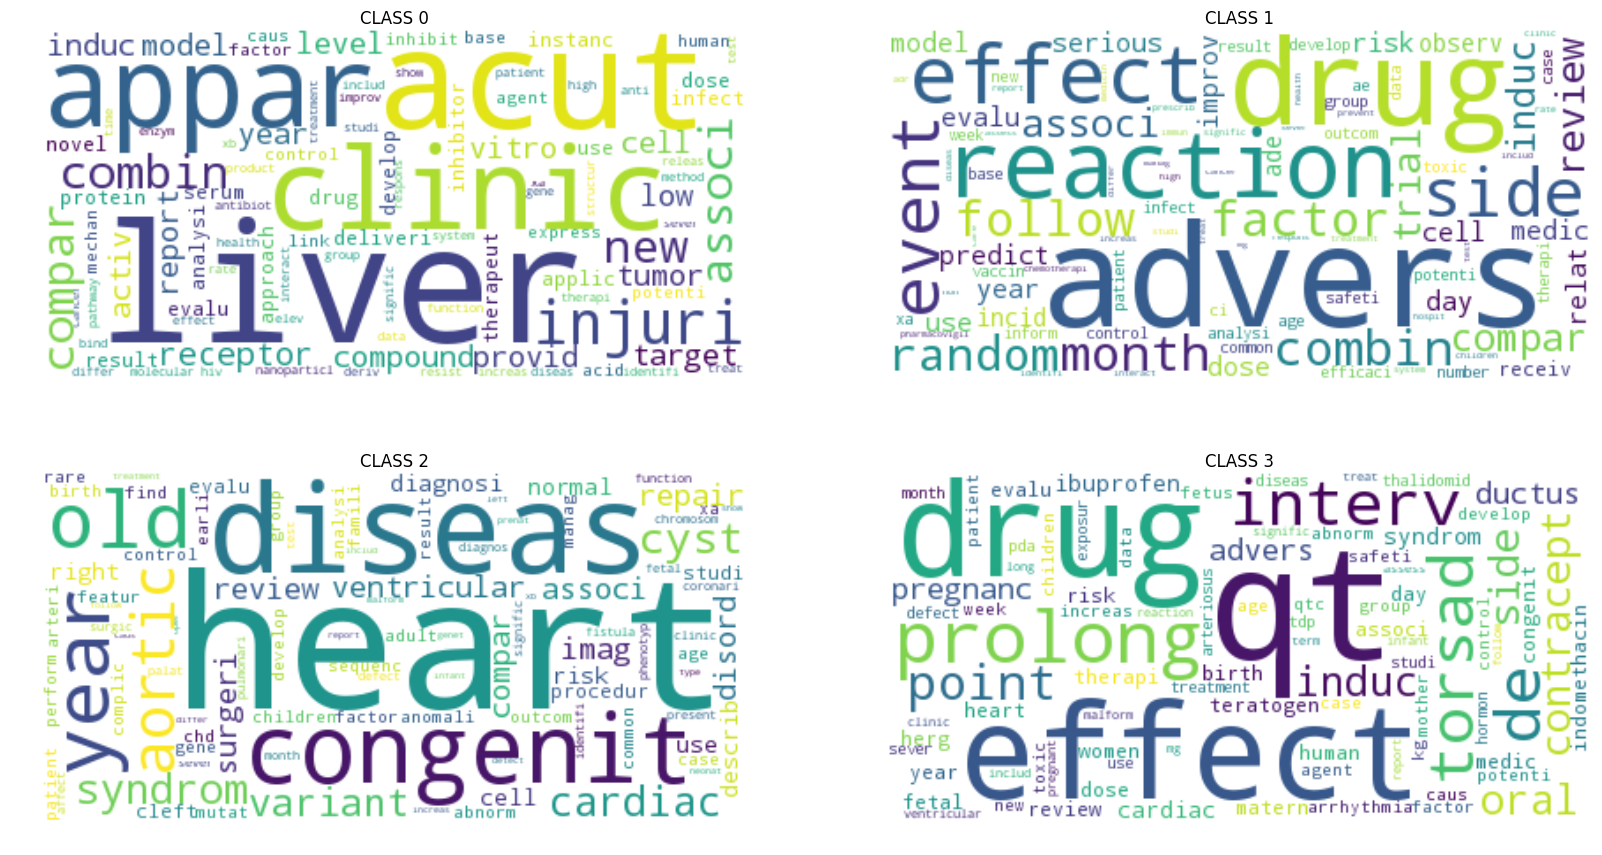

In [202]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=-0.6, wspace=0.2)
for iclass in range(4):
    ind = np.ravel(np.argwhere(y == iclass))
    sumx = np.ravel(X[ind,:].sum(axis=0))
    sumx_isort = (-sumx).argsort()

    text = ''
    for i in range(100):
        text = text + " " + voc[sumx_isort[i]]
    wordcloud = WordCloud(background_color="white").generate(text)
    
    ax = fig.add_subplot(2,2,iclass+1)
    ax.set_title('CLASS '+str(iclass), fontsize=12)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    
plt.show()
fig.savefig('./docs/images/wordcloud_tfidf.png')

# Synsets

In [81]:
from nltk.corpus import wordnet 
syn = wordnet.synsets('drug')[0] 
  
print ("Synset name :  ", syn.name())  
print ("Synset abstract term :  ", syn.hypernyms()) 
print ("Synset specific term :  ", syn.hypernyms()[0].hyponyms()) 
print ("Synset root hypernerm :  ", syn.root_hypernyms()) 

Synset name :   drug.n.01
Synset abstract term :   [Synset('agent.n.03')]
Synset specific term :   [Synset('antacid.n.01'), Synset('antiflatulent.n.01'), Synset('antifungal.n.01'), Synset('bacteriostat.n.01'), Synset('bleaching_agent.n.01'), Synset('chemical_agent.n.01'), Synset('coagulant.n.01'), Synset('coolant.n.01'), Synset('dilutant.n.01'), Synset('disinfectant.n.01'), Synset('drug.n.01'), Synset('emmenagogue.n.01'), Synset('galactagogue.n.01'), Synset('hypnagogue.n.01'), Synset('hypoglycemic_agent.n.01'), Synset('inducer.n.01'), Synset('lactifuge.n.01'), Synset('lactogen.n.01'), Synset('mitogen.n.01'), Synset('nerve_gas.n.01'), Synset('precipitant.n.01'), Synset('solvating_agent.n.01'), Synset('vermicide.n.01'), Synset('viricide.n.01')]
Synset root hypernerm :   [Synset('entity.n.01')]
